In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mpl_toolkits.mplot3d.axes3d as a3
import seaborn as sns

In [4]:
# generate array of 50 values
a = np.random.normal(loc=0, scale=1, size=50)

# generate another array of 50 values that is correlated to a, e.g. b = 5 + 2a
b = 5 + 2 * a

In [5]:
# mean, variance and standard deviation of a
mean_a = np.mean(a)
var_a = np.var(a)
std_a = np.std(a)

In [6]:
# covariance and correlation between a and b
cov_ab = np.cov(a, b)[0, 1]
corr_ab = np.corrcoef(a, b)[0, 1]

print(cov_ab)
print(corr_ab)

1.8868168210293776
1.0


In [7]:
# converting a and b to pandas df
df = pd.DataFrame({'a': a, 'b': b})
# covariance and correlation using pandas
cov_ab_df = df.cov().loc['a', 'b']
corr_ab_df = df.corr().loc['a', 'b']

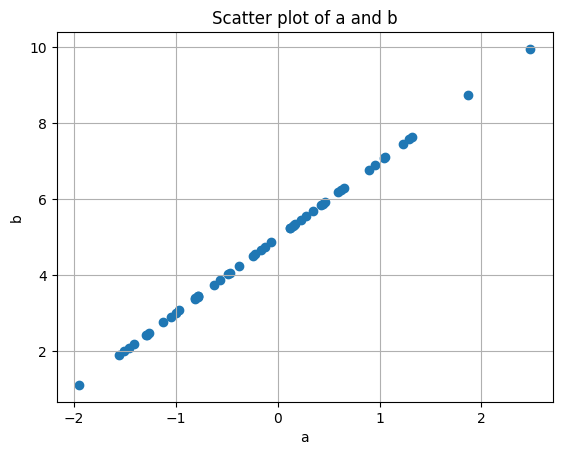

In [11]:
# create scatter plot of a and b
plt.scatter(a, b)
plt.xlabel('a')
plt.ylabel('b')
plt.title('Scatter plot of a and b')
plt.grid()
plt.show()

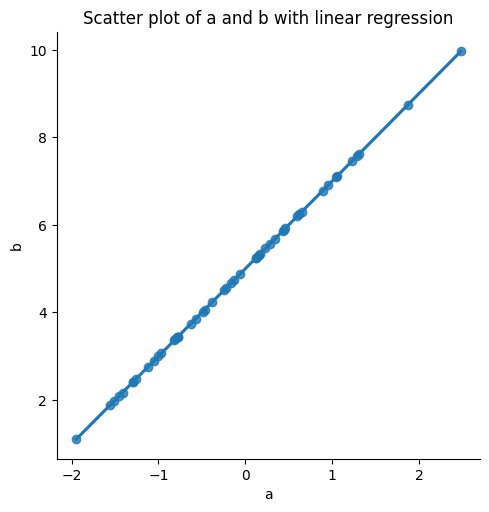

In [12]:
# scatter plot with linear regression using seaborn
sns.lmplot(x='a', y='b', data=df)
plt.title('Scatter plot of a and b with linear regression')
plt.show()

In [13]:
# create a 3rd random array c of 50 values
c = np.random.normal(loc=10, scale=5, size=50)

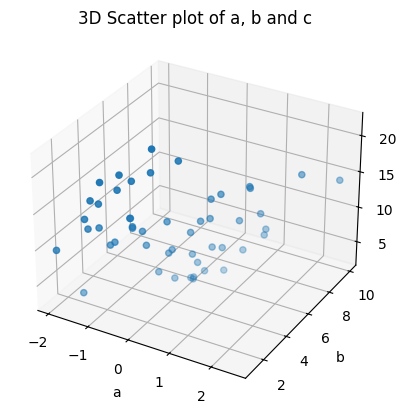

In [14]:
# create scatter plot of c
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a, b, c)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('c')
plt.title('3D Scatter plot of a, b and c')
plt.show()

In [30]:
# create twi variable x and y with 51 linear spalced values between -pi and pi using linspace from numpy
x = np.linspace(-np.pi, np.pi, 51)
y = np.linspace(-np.pi, np.pi, 51)
# create a meshgrid from x and y
X, Y = np.meshgrid(x, y)

# create a matrix z using the equation z = cos(x) * sin(y)
Z = np.cos(X) * np.sin(Y)

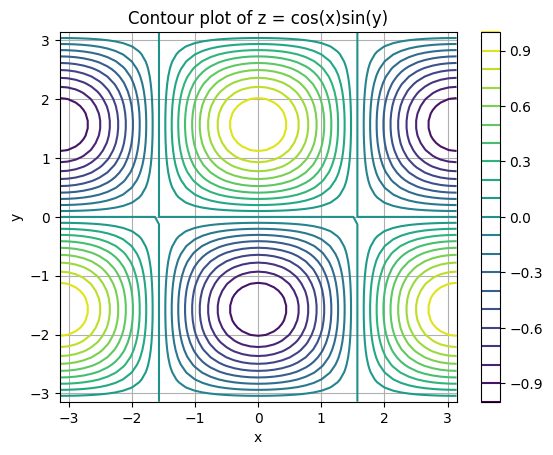

In [31]:
# generate a countour plot of z
plt.contour(X, Y, Z, levels=20)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour plot of z = cos(x)sin(y)')
plt.colorbar()
plt.grid()
plt.show()

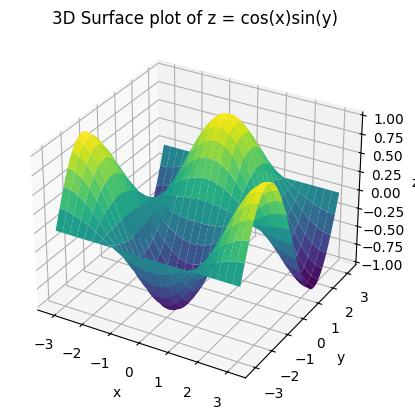

In [32]:
# 3d surface plot of z
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('3D Surface plot of z = cos(x)sin(y)')
plt.show()

Working with Pandas

In [34]:
# Import the Iris dataset from a CSV file
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv(url, names=columns)

In [35]:
print(iris)

     sepal_length  sepal_width  petal_length  petal_width      class
0    sepal_length  sepal_width  petal_length  petal_width    species
1             5.1          3.5           1.4          0.2     setosa
2             4.9          3.0           1.4          0.2     setosa
3             4.7          3.2           1.3          0.2     setosa
4             4.6          3.1           1.5          0.2     setosa
..            ...          ...           ...          ...        ...
146           6.7          3.0           5.2          2.3  virginica
147           6.3          2.5           5.0          1.9  virginica
148           6.5          3.0           5.2          2.0  virginica
149           6.2          3.4           5.4          2.3  virginica
150           5.9          3.0           5.1          1.8  virginica

[151 rows x 5 columns]


In [36]:
# print the shape of the dataframe and the column names
print(iris.shape)
print(iris.columns)

(151, 5)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')


In [55]:
# ensure that the measures are in numeric format
iris['sepal_length'] = pd.to_numeric(iris['sepal_length'], errors='coerce')
iris['sepal_width'] = pd.to_numeric(iris['sepal_width'], errors='coerce')
iris['petal_length'] = pd.to_numeric(iris['petal_length'], errors='coerce')
iris['petal_width'] = pd.to_numeric(iris['petal_width'], errors='coerce')

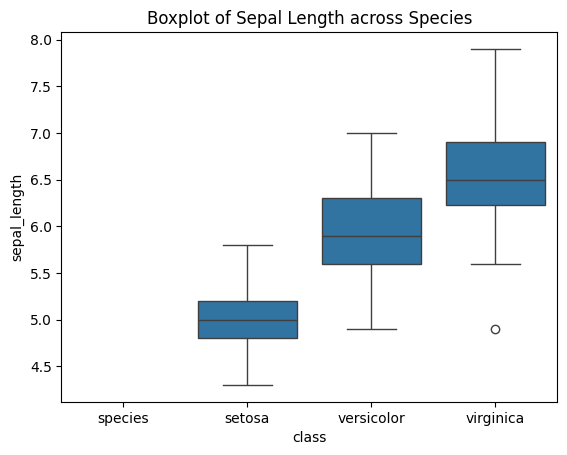

In [56]:
# create a boxplot to show the distribution of the sepal length across species
sns.boxplot(x='class', y='sepal_length', data=iris)
plt.title('Boxplot of Sepal Length across Species')
plt.show()

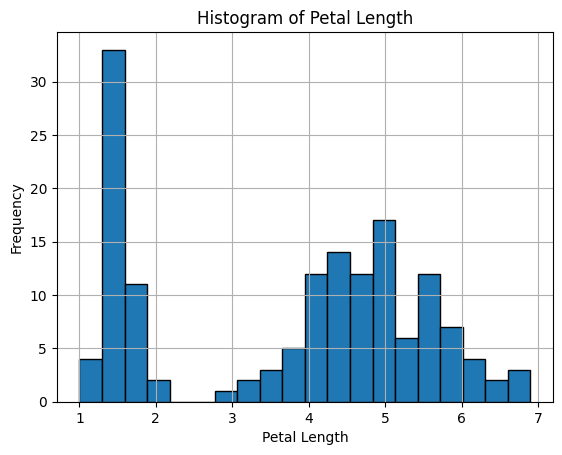

In [57]:
# create a histogram to show the distribution of the petal length
plt.hist(iris['petal_length'], bins=20, edgecolor='black')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Length')
plt.grid()
plt.show()

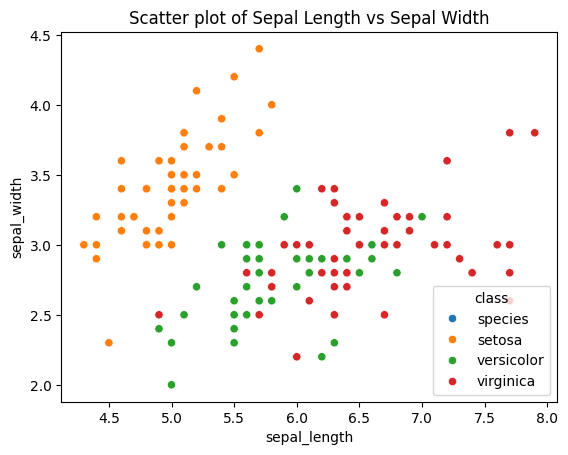

In [60]:
# create a scatter plot to show the relationship between sepal length and sepal width
sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=iris)
plt.title('Scatter plot of Sepal Length vs Sepal Width')
plt.show()

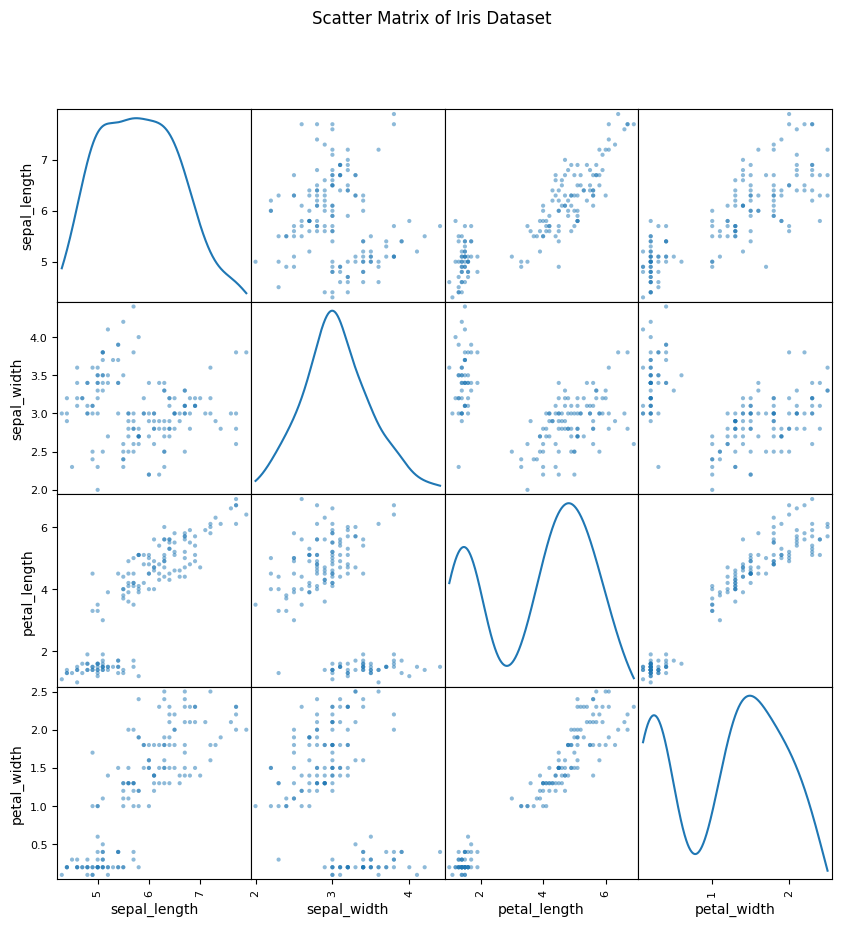

In [61]:
# create a scatter_matrix to show the relationship between all the measures
pd.plotting.scatter_matrix(iris, figsize=(10, 10), diagonal='kde')
plt.suptitle('Scatter Matrix of Iris Dataset')
plt.show()

Implement Perceptron and MLP from SCIKIT-LEARN

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [79]:
# build a simple 2-class dataset with two features using make_classification from sklearn
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

In [80]:
# create training and test sets using train_test_split from sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

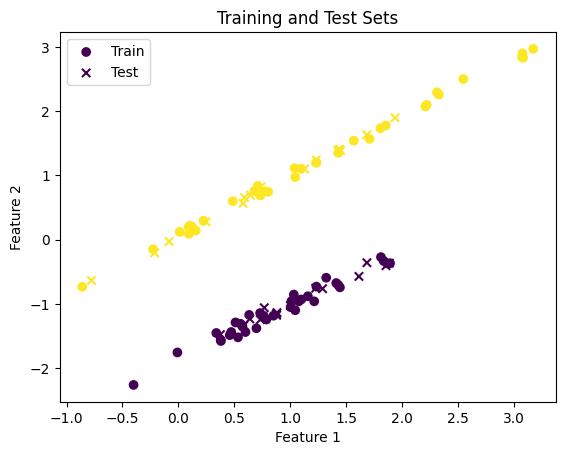

In [81]:
# create scatter graphs of the training and test sets
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Test')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training and Test Sets')
plt.legend()
plt.show()